In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset

In [3]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Finding missing values

<IPython.core.display.Javascript object>

<AxesSubplot:>

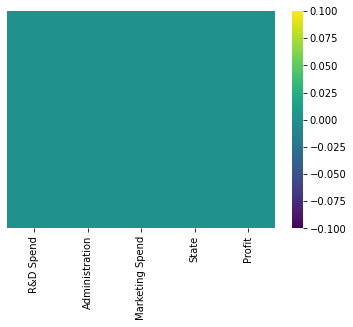

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

## combining independent dataset into one

In [5]:
X=df.iloc[:,:-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


## Dependent dataset

In [6]:
Y=df.iloc[:,4:]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Change categorical values into numerical values

In [7]:
states=pd.get_dummies(X['State'])
states.columns = ['California','Florida','New York']

In [8]:
states.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


## drop State

In [9]:
X=X.drop('State',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


## Now again add new numerical column to X

In [10]:
X=pd.concat([X,states],axis=1)

In [11]:
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


# dataset is ready for training

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
LR=LinearRegression()

In [16]:
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)

In [18]:
score=r2_score(Y_test,y_pred)
print(score)

0.9783259006629259
